In [79]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [80]:
# Cargar datos
data = np.genfromtxt(os.path.join('Datasets', 'kc_house_data.csv'), delimiter=',', skip_header=1)

# Obtener las columnas necesarias
sqft_living = data[:, 5]
bedrooms = data[:, 3]
y = data[:, 2]
m = y.size
#sqft_living = data[:, 5]
#bedrooms = data[:, 3]
#price = data[:, 2]


X = np.column_stack((sqft_living, bedrooms))
# Imprimir algunos puntos de datos
print('{:>12s}{:>10s}{:>10s}'.format('sqft_living', 'bedrooms', 'price'))
print('-'*36)
for i in range(10):
    print('{:12.0f}{:10.0f}{:10.0f}'.format(X[i,0], X[i,1], y[i]))

#sqft_living  bedrooms     price
#------------------------------------
#        1180         3    221900
#        2570         3    538000
#         770         2    180000


 sqft_living  bedrooms     price
------------------------------------
        1180         3    221900
        2570         3    538000
         770         2    180000
        1960         4    604000
        1680         3    510000
        5420         4   1225000
        1715         3    257500
        1060         3    291850
        1780         3    229500
        1890         3    323000


In [81]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma

In [82]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

[[1.18e+03 3.00e+00]
 [2.57e+03 3.00e+00]
 [7.70e+02 2.00e+00]
 ...
 [1.02e+03 2.00e+00]
 [1.60e+03 3.00e+00]
 [1.02e+03 2.00e+00]]
Media calculada: [2079.89973627    3.37084162]
Desviación estandar calculada: [918.41964938   0.93004031]
[[-0.97983502 -0.39873715]
 [ 0.53363434 -0.39873715]
 [-1.42625404 -1.47395936]
 ...
 [-1.15404732 -1.47395936]
 [-0.52252773 -0.39873715]
 [-1.15404732 -1.47395936]]


In [83]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [84]:
print(X)

[[ 1.         -0.97983502 -0.39873715]
 [ 1.          0.53363434 -0.39873715]
 [ 1.         -1.42625404 -1.47395936]
 ...
 [ 1.         -1.15404732 -1.47395936]
 [ 1.         -0.52252773 -0.39873715]
 [ 1.         -1.15404732 -1.47395936]]


descenso por el gradiente

In [85]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento
    
    J = 0
    
    h = np.dot(X, theta)
    
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    
    return J


In [86]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    
    # Inicializa algunos valores 
    m = y.shape[0] # numero de ejemplos de entrenamiento
    
    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))
    
    return theta, J_history

theta calculado por el descenso por el gradiente: [530215.85991459 256740.20712102 -21904.95681083]
El precio predecido para una casa de 1650 sq-ft y 3 dormitorios (usando el descenso por el gradiente): $237069


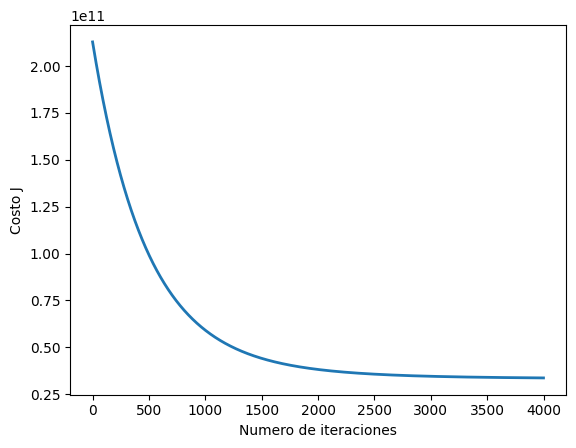

In [87]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001 # alpha = 0.003
num_iters = 4000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(3)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Estimar el precio para una casa de 1650 sq-ft, con 3 dormitorios
X_array = [1, 1000, 3]
X_array[1:3] = (X_array[1:3] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El precio predecido para una casa de 1650 sq-ft y 3 dormitorios (usando el descenso por el gradiente): ${:.0f}'.format(price))

In [88]:
X_array = [1, 1650, 3]
X_array[1:3] = (X_array[1:3] - mu) / sigma

In [89]:
X_array[0:3]

[1, -0.46808638791504703, -0.3987371485515711]

calculo de la normal

In [112]:
# Cargar datos
data = np.genfromtxt(os.path.join('Datasets', 'kc_house_data.csv'), delimiter=',', skip_header=1)

# Obtener las columnas necesarias
sqft_living = data[:, 5]
bedrooms = data[:, 3]
y = data[:, 2]
m = y.size
#sqft_living = data[:, 5]
#bedrooms = data[:, 3]
#price = data[:, 2]



X = np.column_stack((sqft_living, bedrooms))
X = np.concatenate([np.ones((m, 1)), X], axis=1)

# Imprimir algunos puntos de datos
print('{:>12s}{:>10s}{:>10s}'.format('sqft_living', 'bedrooms', 'price'))
print('-'*36)
for i in range(10):
    print('{:12.0f}{:10.0f}{:10.0f}'.format(X[i,0], X[i,1], y[i]))

 sqft_living  bedrooms     price
------------------------------------
           1      1180    221900
           1      2570    538000
           1       770    180000
           1      1960    604000
           1      1680    510000
           1      5420   1225000
           1      1715    257500
           1      1060    291850
           1      1780    229500
           1      1890    323000


In [97]:
def normalEqn(X, y):
  
    theta = np.zeros(X.shape[1])
    
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    
    return theta

In [98]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y);

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));

# Estimar el precio para una casa de superficie de 1650 sq-ft y tres dormitorios

X_array = [1, 1650, 3]
price = np.dot(X_array, theta) 

print('Precio predecido para una cada de superficie de 1650 sq-ft y 3 dormitorios (usando la ecuación de la normal): ${:.0f}'.format(price))

Theta calculado a partir de la ecuación de la normal: [ 79469.35907477    313.94868588 -57066.75892292]
Precio predecido para una cada de superficie de 1650 sq-ft y 3 dormitorios (usando la ecuación de la normal): $426284
